In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.transforms import (
    Bbox, TransformedBbox, blended_transform_factory)
from mpl_toolkits.axes_grid1.inset_locator import (
    BboxPatch, BboxConnector, BboxConnectorPatch)

In [3]:
def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = {
            **prop_lines,
            "alpha": prop_lines.get("alpha", 1) * 0.2,
            "clip_on": False,
        }

    c1 = BboxConnector(
        bbox1, bbox2, loc1=loc1a, loc2=loc2a, clip_on=False, **prop_lines)
    c2 = BboxConnector(
        bbox1, bbox2, loc1=loc1b, loc2=loc2b, clip_on=False, **prop_lines)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           clip_on=False,
                           **prop_patches)

    return c1, c2, bbox_patch1, bbox_patch2, p

In [4]:
def zoom_effect01(ax1, ax2, xmin, xmax, **kwargs):
    """
    Connect *ax1* and *ax2*. The *xmin*-to-*xmax* range in both axes will
    be marked.

    Parameters
    ----------
    ax1
        The main axes.
    ax2
        The zoomed axes.
    xmin, xmax
        The limits of the colored area in both plot axes.
    **kwargs
        Arguments passed to the patch constructor.
    """

    bbox = Bbox.from_extents(xmin, 0, xmax, 1)

    mybbox1 = TransformedBbox(bbox, ax1.get_xaxis_transform())
    mybbox2 = TransformedBbox(bbox, ax2.get_xaxis_transform())

    prop_patches = {**kwargs, "ec": "none", "alpha": 0.2}

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1, mybbox2,
        loc1a=3, loc2a=2, loc1b=4, loc2b=1,
        prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p

In [5]:
def zoom_effect02(ax1, ax2, **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes

    Similar to zoom_effect01.  The xmin & xmax will be taken from the
    ax1.viewLim.
    """

    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(ax2.transData, tt)

    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)

    prop_patches = {**kwargs, "ec": "none", "alpha": 0.2}

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1, mybbox2,
        loc1a=3, loc2a=2, loc1b=4, loc2b=1,
        prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


# 轴缩放（不同epoch不同metric曲线结果对比）

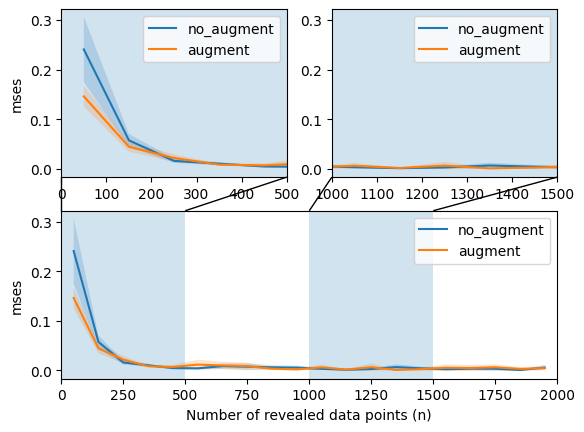

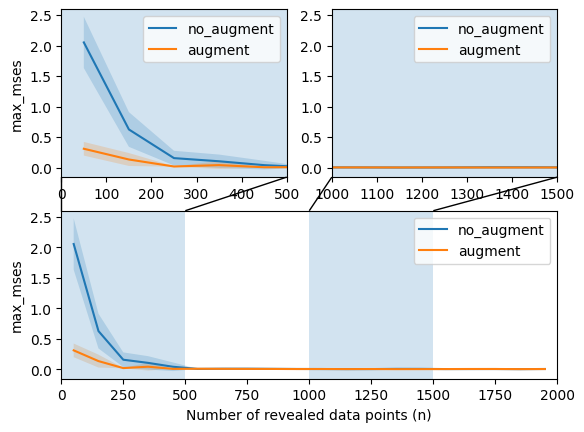

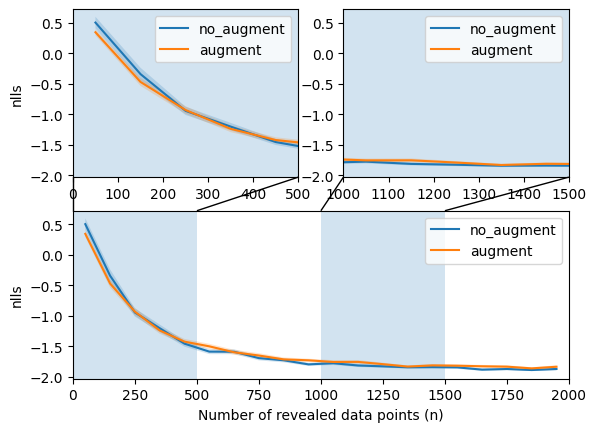

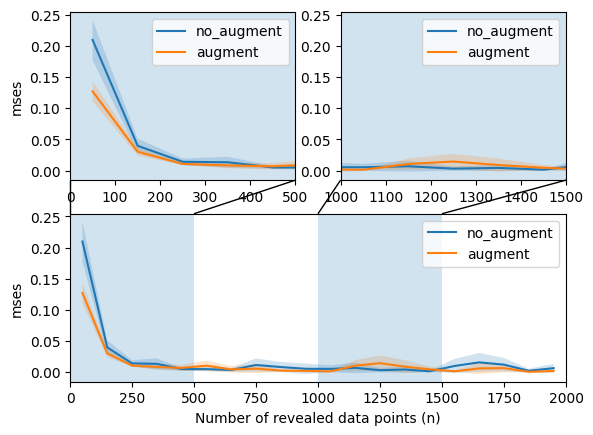

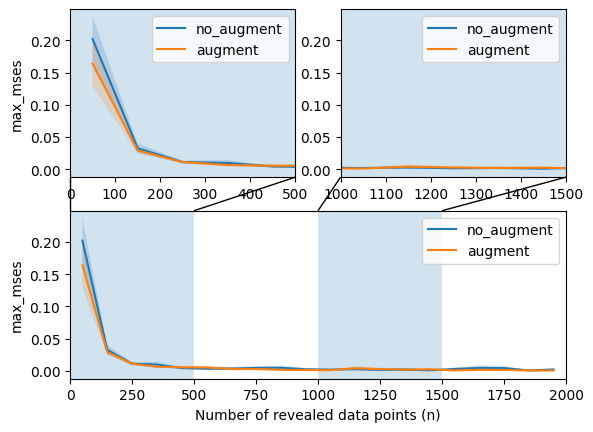

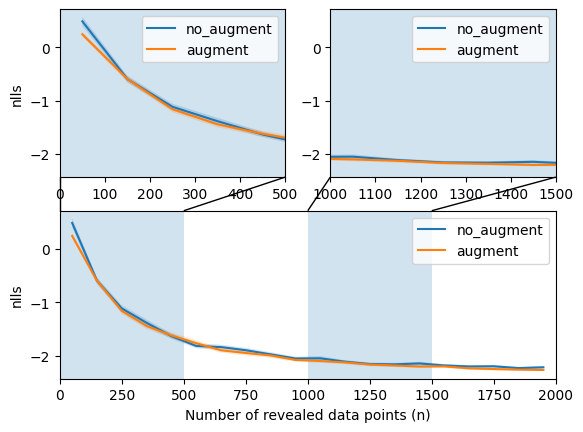

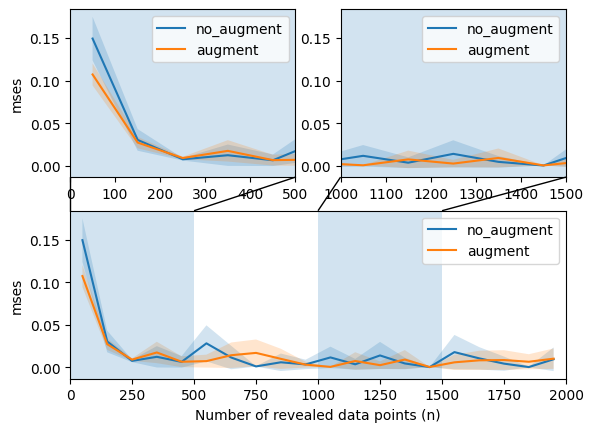

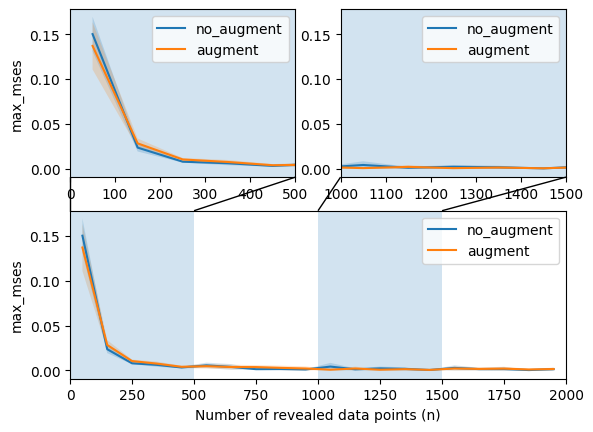

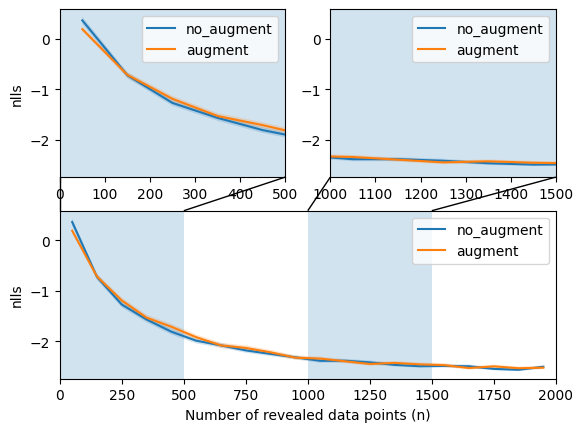

In [23]:
import pandas as pd
test_data_root = './test_data/ifaugment'
test_curve_root = './test_curves/ifaugment'
num_borders = 1000
batch_fraction = 8
lr = 0.0001*batch_fraction
epoch_list = [50,100,200]
metric_list = ['mse','max_mse','nll']
for epochs in [int(x*25/batch_fraction) for x in epoch_list]:
    for metric in metric_list:
        result = pd.read_excel(f'{test_data_root}/numborder{num_borders}_lr{lr}_epoch{epochs}_GPfitting.xlsx', index_col=0)
        axs = plt.figure().subplot_mosaic([
            ["zoom1", "zoom2"],
            ["main", "main"],
        ])
        axs["main"].set(xlim=(0, 2000))
        axs["main"].plot(result.index,result[f'{metric}s_noaugment'],label='no_augment')
        axs["main"].fill_between(result.index,result[f'{metric}s_noaugment']-result[f'{metric}_confidences_noaugment'],\
                                 result[f'{metric}s_noaugment']+result[f'{metric}_confidences_noaugment'],alpha=0.2)
        axs["main"].plot(result.index,result[f'{metric}s_augment'],label='augment')
        axs["main"].fill_between(result.index,result[f'{metric}s_augment']-result[f'{metric}_confidences_augment'],\
                                 result[f'{metric}s_augment']+result[f'{metric}_confidences_augment'],alpha=0.2)
        axs["zoom1"].set(xlim=(0,500))
        zoom_effect01(axs["zoom1"], axs["main"], 0, 500)
        axs["zoom1"].plot(result.index,result[f'{metric}s_noaugment'],label='no_augment')
        axs["zoom1"].fill_between(result.index,result[f'{metric}s_noaugment']-result[f'{metric}_confidences_noaugment'],\
                                 result[f'{metric}s_noaugment']+result[f'{metric}_confidences_noaugment'],alpha=0.2)
        axs["zoom1"].plot(result.index,result[f'{metric}s_augment'],label='augment')
        axs["zoom1"].fill_between(result.index,result[f'{metric}s_augment']-result[f'{metric}_confidences_augment'],\
                                 result[f'{metric}s_augment']+result[f'{metric}_confidences_augment'],alpha=0.2)
        axs["zoom2"].set(xlim=(1000, 1500))
        zoom_effect02(axs["zoom2"], axs["main"])
        axs["zoom2"].plot(result.index,result[f'{metric}s_noaugment'],label='no_augment')
        axs["zoom2"].fill_between(result.index,result[f'{metric}s_noaugment']-result[f'{metric}_confidences_noaugment'],\
                                 result[f'{metric}s_noaugment']+result[f'{metric}_confidences_noaugment'],alpha=0.2)
        axs["zoom2"].plot(result.index,result[f'{metric}s_augment'],label='augment')
        axs["zoom2"].fill_between(result.index,result[f'{metric}s_augment']-result[f'{metric}_confidences_augment'],\
                                 result[f'{metric}s_augment']+result[f'{metric}_confidences_augment'],alpha=0.2)
        axs['main'].set_xlabel('Number of revealed data points (n)')
        axs['main'].set_ylabel(f'{metric}s')
        axs['zoom1'].set_ylabel(f'{metric}s')
        
        axs['main'].legend()
        axs['zoom1'].legend()
        axs['zoom2'].legend()
        plt.savefig(f'{test_curve_root}/numborder{num_borders}_lr{lr}_epoch{epochs}/{metric}s_zoomin.png')
        plt.show()

In [12]:
result

,mses_noaugment,mses_augment,mse_confidences_augment,max_mses_noaugment,max_mses_augment,max_mse_confidences_augment,nlls_noaugment,nlls_augment,nll_confidences_noaugment,nll_confidences_augment
eval_positions,,,,,,,,,,
50,0.122638,0.114722,0.014088,0.140933,0.147867,0.016792,0.309970,0.225508,0.067728,0.048313
150,0.023396,0.044427,0.034232,0.022629,0.084857,0.117879,-0.753470,-0.708118,0.059463,0.056687
250,0.013212,0.013505,0.008625,0.009128,0.010028,0.002143,-1.297699,-1.207731,0.055853,0.057172
350,0.021139,0.012927,0.010798,0.006120,0.006183,0.001600,-1.552038,-1.535666,0.058909,0.060293
450,0.019641,0.014764,0.011819,0.006812,0.004823,0.001874,-1.811405,-1.779314,0.056314,0.061236
550,0.021268,0.011602,0.010144,0.005591,0.005277,0.003541,-1.911613,-1.924955,0.055821,0.055176
650,0.007541,0.009713,0.010402,0.002652,0.003195,0.002179,-2.105607,-2.070410,0.047597,0.049465
750,0.016675,0.008934,0.008849,0.003846,0.002708,0.001771,-2.207654,-2.152224,0.047382,0.051344
850,0.013569,0.010556,0.009608,0.003821,0.002868,0.001929,-2.262948,-2.200794,0.045587,0.049483


# 不同epoch同一个metric曲线结果对比

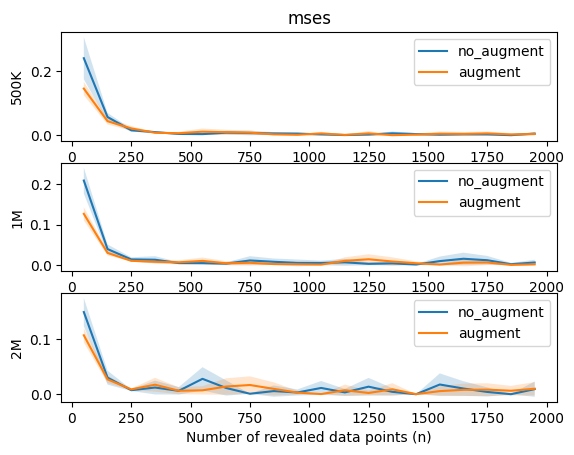

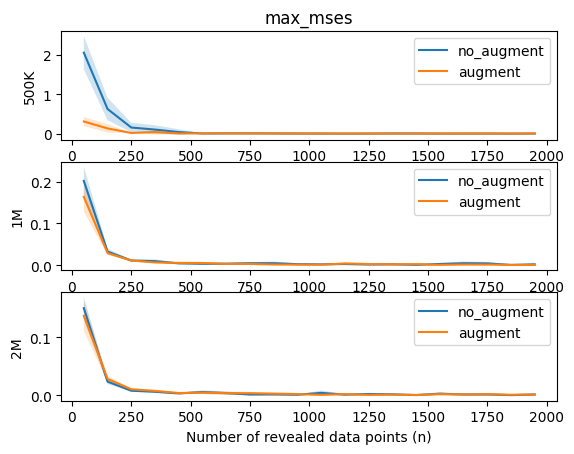

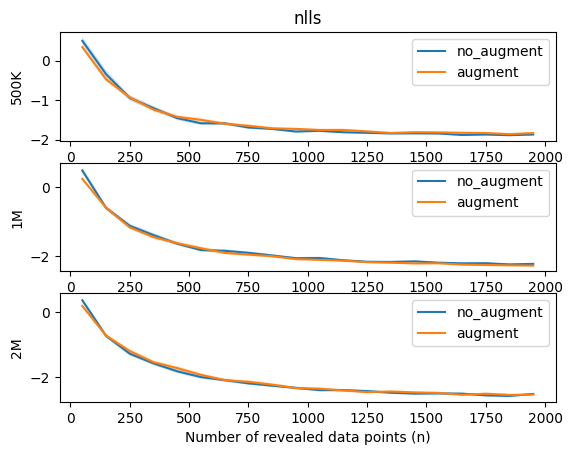

In [22]:
test_data_root = './test_data/ifaugment'
test_curve_epoch_root = './test_curves/ifaugment/epoch_comparison'
import os
if not os.path.exists(test_curve_epoch_root):
    os.makedirs(test_curve_epoch_root)
num_borders = 1000
batch_fraction = 8
lr = 0.0001*batch_fraction
epoch_list = [50,100,200]
metric_list = ['mse','max_mse','nll']
dataset_size = {156:'500K',312:'1M',625:'2M'}
for metric in metric_list:
    fig, ax = plt.subplots(len(epoch_list),1)
    for i in range(len(epoch_list)):
        epochs = int(epoch_list[i]*25/batch_fraction)
        result = pd.read_excel(f'{test_data_root}/numborder{num_borders}_lr{lr}_epoch{epochs}_GPfitting.xlsx', index_col=0)
        ax[i].plot(result.index,result[f'{metric}s_noaugment'],label='no_augment')
        ax[i].plot(result.index,result[f'{metric}s_augment'],label='augment')
        ax[i].fill_between(result.index,result[f'{metric}s_noaugment']-result[f'{metric}_confidences_noaugment'],\
                          result[f'{metric}s_noaugment']+result[f'{metric}_confidences_noaugment'],alpha=0.2)
        ax[i].fill_between(result.index,result[f'{metric}s_augment']-result[f'{metric}_confidences_augment'],\
                          result[f'{metric}s_augment']+result[f'{metric}_confidences_augment'],alpha=0.2)
        ax[i].set_ylabel(f'{dataset_size[epochs]}')
        ax[i].legend()
        
    ax[0].set_title(f'{metric}s')
    ax[len(epoch_list)-1].set_xlabel('Number of revealed data points (n)')
    plt.savefig(f'{test_curve_epoch_root}/{metric}s.png')
    plt.show()